In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
data = pd.read_csv("/content/Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.shape

(545, 13)

In [ ]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

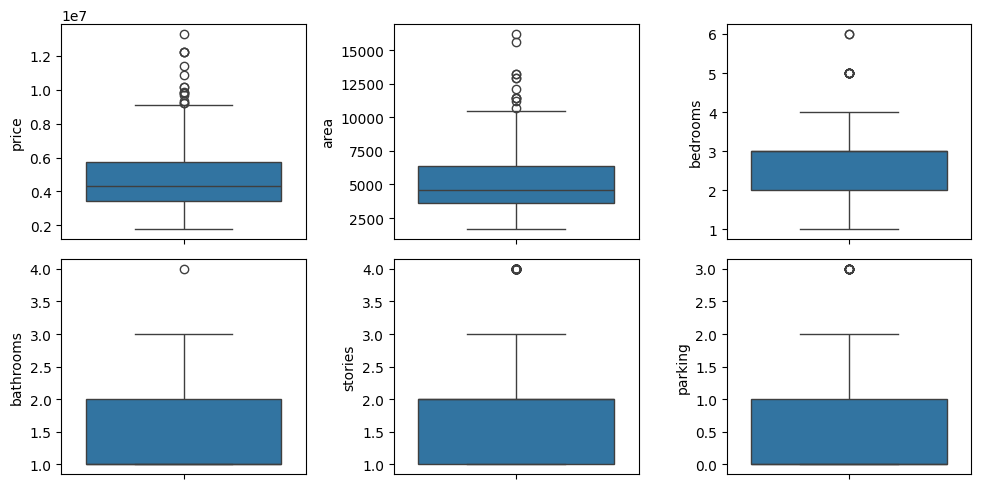

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(10,5))

plt1=sns.boxplot(data['price'],ax=axes[0,0])
plt2=sns.boxplot(data['area'],ax=axes[0,1])
plt3=sns.boxplot(data['bedrooms'],ax=axes[0,2])
plt4=sns.boxplot(data['bathrooms'],ax=axes[1,0])
plt5=sns.boxplot(data['stories'],ax=axes[1,1])
plt6=sns.boxplot(data['parking'],ax=axes[1,2])


plt.tight_layout()

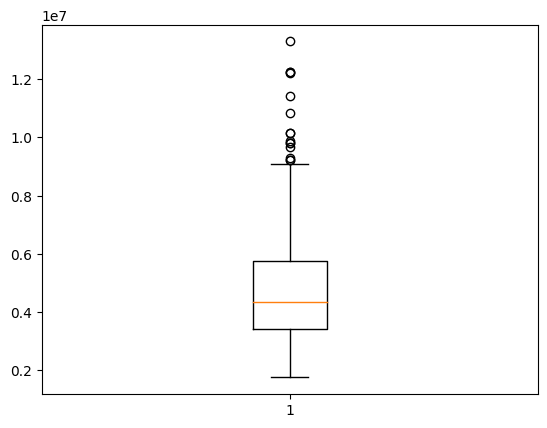

In [ ]:
plt.boxplot(data.price)
Q1= data.price.quantile(0.25)
Q3=data.price.quantile(0.75)
IQ=Q3-Q1
data=data[(data.price>=Q1-1.5*IQ) & (data.price<=Q3+1.5*IQ)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7b499de7e560>,
 'caps': [<matplotlib.lines.Line2D at 0x7b499de7fd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b499de7f6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b499deb4310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b499deb45b0>],
 'means': []}

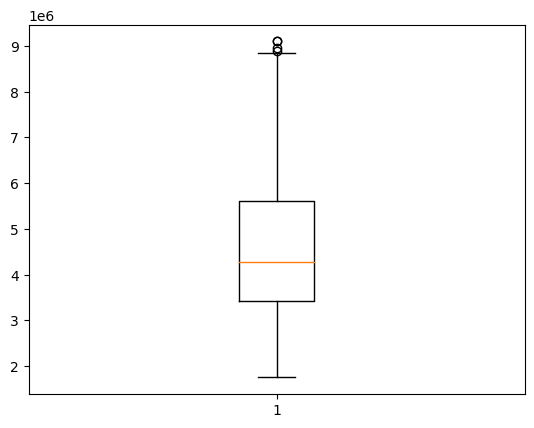

In [ ]:
plt.boxplot(data['price'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7b499deb6d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7b499deb7250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b499deb6a70>],
 'medians': [<matplotlib.lines.Line2D at 0x7b499deb7790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b499deb7a30>],
 'means': []}

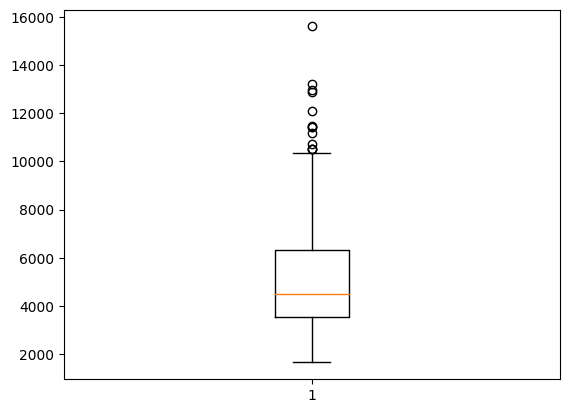

In [ ]:
plt.boxplot(data.area)

In [ ]:
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3-Q1
data = data[(data.area>=Q1-1.5*IQR)&(data.area<=Q3+1.5*IQR)]

In [ ]:
data.duplicated().sum()

0

<Figure size 1000x500 with 0 Axes>

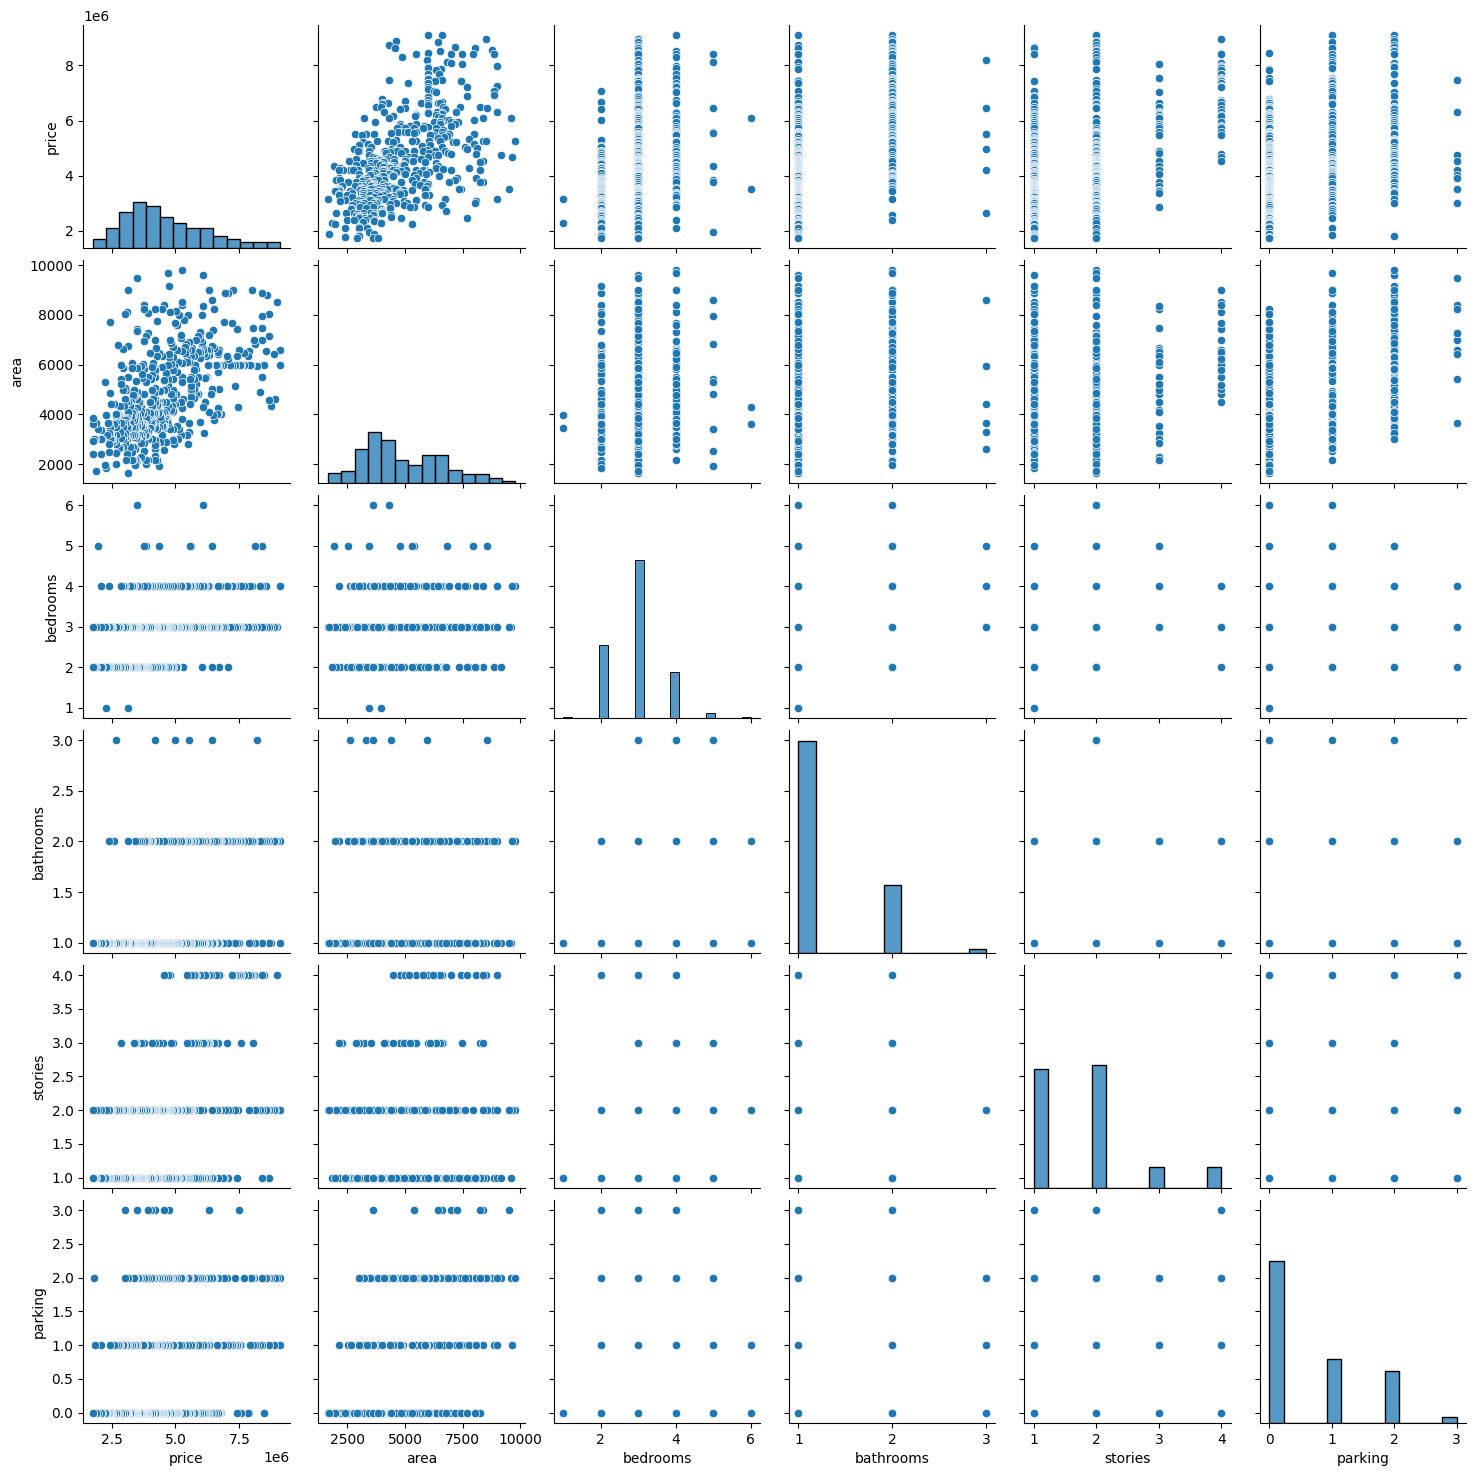

In [ ]:
plt.figure(figsize=(10,5))

sns.pairplot(data)

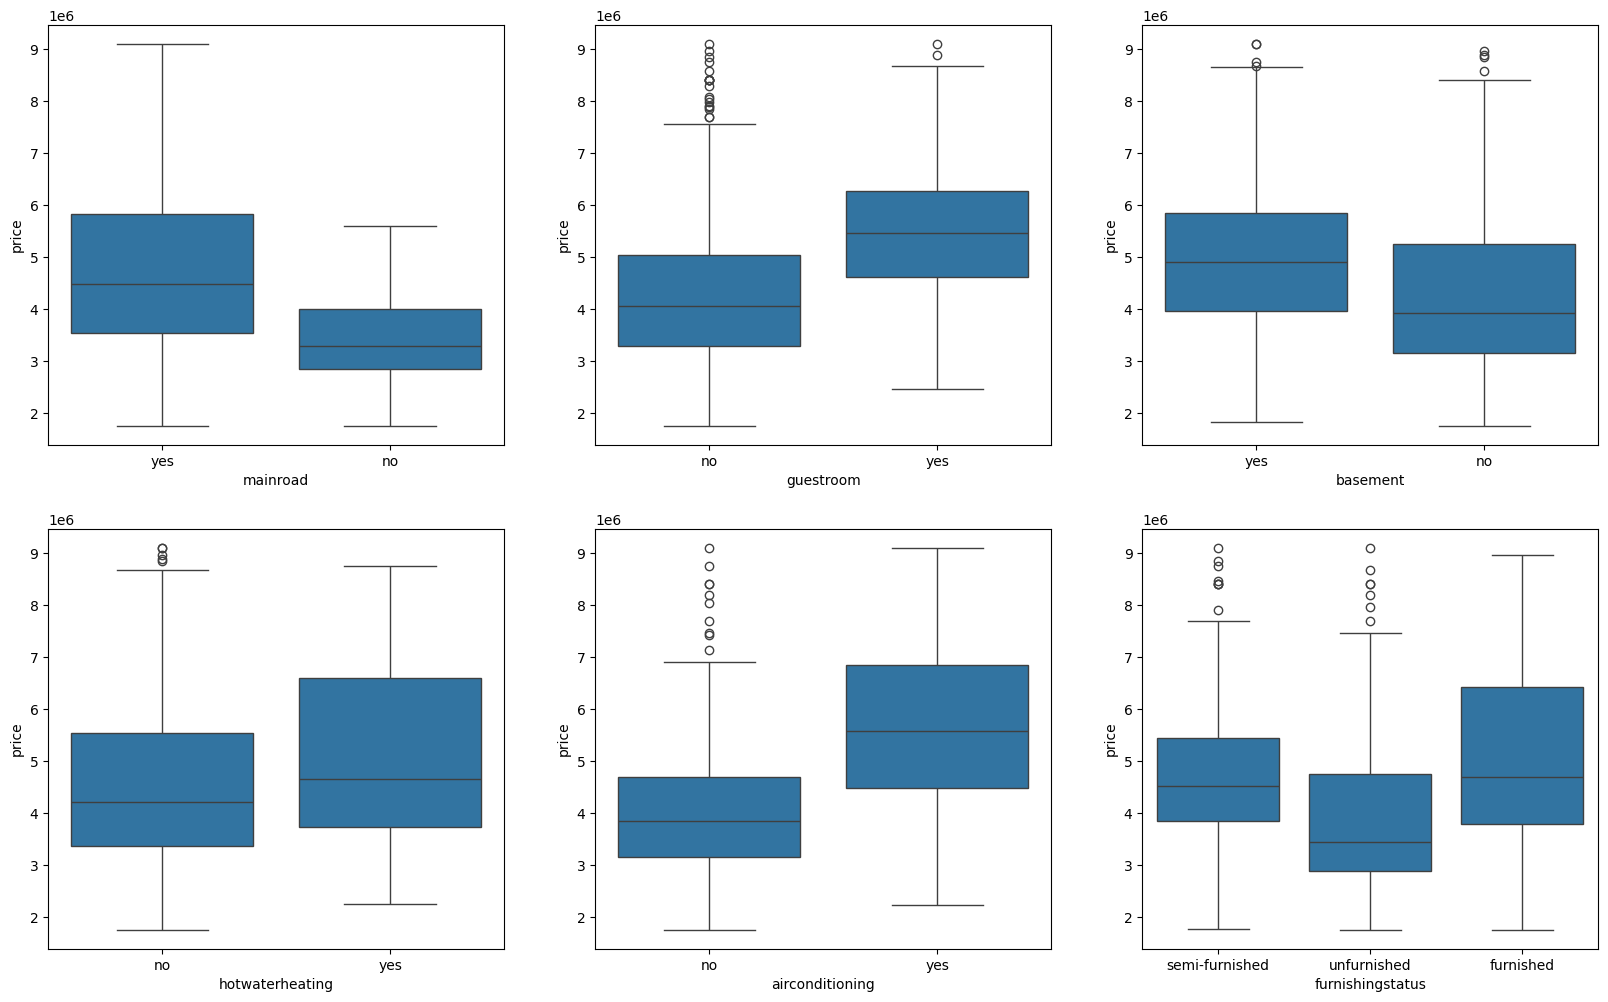

In [ ]:
#categorical data

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = data)
plt.show()

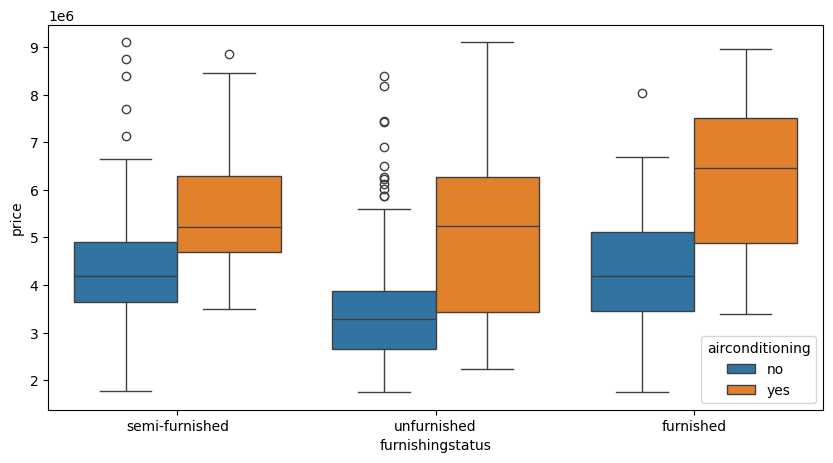

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="furnishingstatus",y="price",hue="airconditioning",data=data)
plt.show()

In [ ]:
categorical=[]
for column in data.columns:
  if data[column].dtype == "object":
    categorical.append(column)

categorical.remove('furnishingstatus')
print(categorical)


['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder().fit(data[categorical])
data[categorical]=oe.transform(data[categorical])

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1.0,0.0,1.0,0.0,0.0,2,0.0,semi-furnished
16,9100000,6600,4,2,2,1.0,1.0,1.0,0.0,1.0,1,1.0,unfurnished
17,8960000,8500,3,2,4,1.0,0.0,0.0,0.0,1.0,2,0.0,furnished
18,8890000,4600,3,2,2,1.0,1.0,0.0,0.0,1.0,2,0.0,furnished
19,8855000,6420,3,2,2,1.0,0.0,0.0,0.0,1.0,1,1.0,semi-furnished


In [ ]:
furnishing_dummies = pd.get_dummies(data['furnishingstatus'], prefix='furnishing')
data = pd.concat([data, furnishing_dummies], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
15,9100000,6000,4,1,2,1.0,0.0,1.0,0.0,0.0,2,0.0,False,True,False
16,9100000,6600,4,2,2,1.0,1.0,1.0,0.0,1.0,1,1.0,False,False,True
17,8960000,8500,3,2,4,1.0,0.0,0.0,0.0,1.0,2,0.0,True,False,False
18,8890000,4600,3,2,2,1.0,1.0,0.0,0.0,1.0,2,0.0,True,False,False
19,8855000,6420,3,2,2,1.0,0.0,0.0,0.0,1.0,1,1.0,False,True,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

data[num_vars] = scaler.fit_transform(data[num_vars])

In [ ]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishing_furnished,furnishing_semi-furnished,furnishing_unfurnished
15,1.000000,0.533742,0.6,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,False,True,False
16,1.000000,0.607362,0.6,0.5,0.333333,1.0,1.0,1.0,0.0,1.0,0.333333,1.0,False,False,True
17,0.980952,0.840491,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,True,False,False
18,0.971429,0.361963,0.4,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.666667,0.0,True,False,False
19,0.966667,0.585276,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,False,True,False


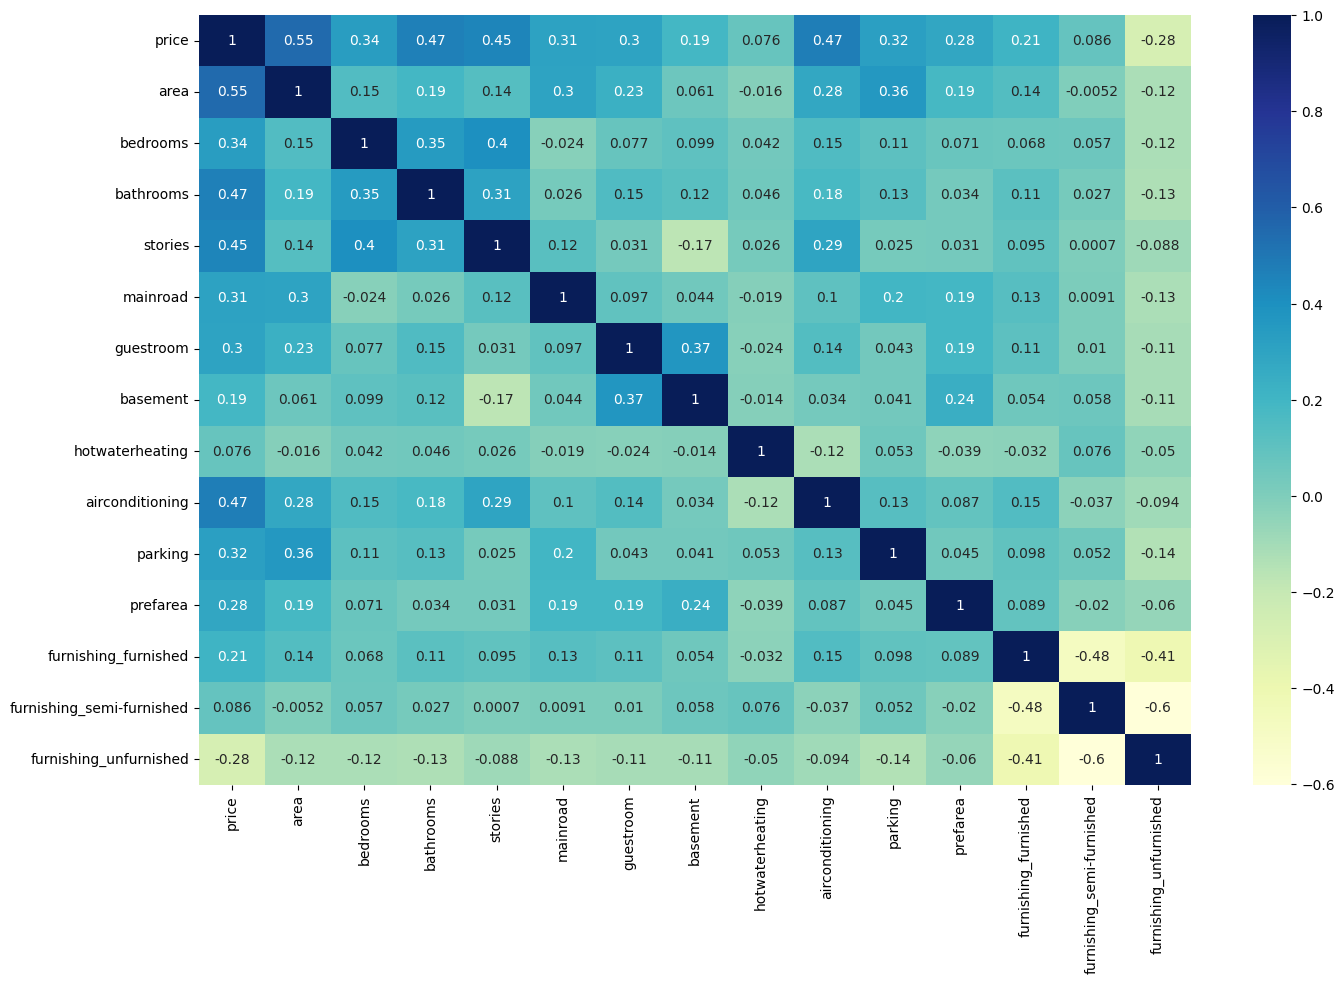

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

<Axes: xlabel='area', ylabel='price'>

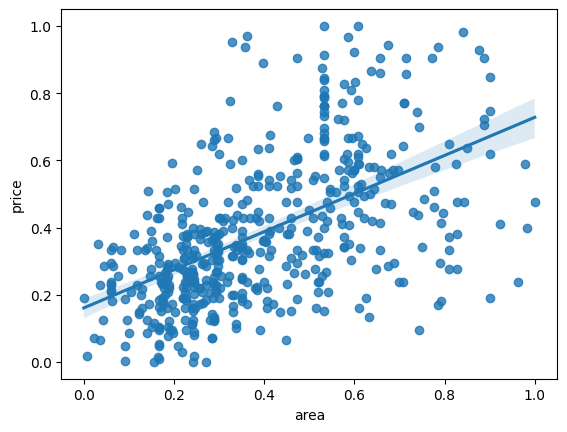

In [ ]:
sns.regplot(x=data["area"], y=data["price"],data=data)

In [ ]:
x,y = data.drop("price",axis=1),data["price"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(359, 14)
(154, 14)
(359,)
(154,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)

In [ ]:
y_pred1

array([0.31515767, 0.35830629, 0.60134621, 0.70540113, 0.40672686,
       0.16402759, 0.29070866, 0.20514081, 0.21461303, 0.42104181,
       0.31983258, 0.12559207, 0.70848527, 0.72359542, 0.38219379,
       0.49103714, 0.23704038, 0.19300916, 0.35091207, 0.1844352 ,
       0.55369936, 0.31038399, 0.24972984, 0.31816814, 0.61703017,
       0.33115877, 0.38369816, 0.19835781, 0.23245237, 0.18599525,
       0.61437161, 0.33770102, 0.24614436, 0.35986983, 0.21970941,
       0.56663147, 0.33812166, 0.20862564, 0.05255185, 0.73356367,
       0.58437555, 0.21328764, 0.30160616, 0.05401804, 0.4207179 ,
       0.55738073, 0.57861043, 0.36540462, 0.06392767, 0.27017164,
       0.40962859, 0.50193098, 0.59081316, 0.27496807, 0.29612992,
       0.4104035 , 0.31055828, 0.41435466, 0.37427558, 0.65167488,
       0.21084562, 0.11831895, 0.28833437, 0.34494465, 0.3664575 ,
       0.4484645 , 0.37142806, 0.40097527, 0.26548325, 0.70760535,
       0.17647213, 0.14038624, 0.32534685, 0.84990012, 0.92083

In [ ]:
print(lr.intercept_)

0.038698948040955194


In [ ]:
plt.scatter(y_test,y_pred1)

In [ ]:
print("MSE : ",mean_squared_error(y_pred1,y_test))
print("MAE : ",mean_absolute_error(y_pred1,y_test))
print('RMSE:', np.sqrt(mean_squared_error(y_pred1,y_test)))
print("R Score :",r2_score(y_pred1,y_test))

MSE :  0.017862717986796735
MAE :  0.10158096389902711
RMSE: 0.13365147955333953
R Score : 0.4350259805941177
